# NLP: Questions Classification (v1)

ML Sample of Natural Language Processing.

## Dataset

[Quora Insincere Questions Classification](https://www.kaggle.com/competitions/quora-insincere-questions-classification/overview)
> Detect toxic content to improve online conversations

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

from nltk.corpus import stopwords
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Load Train Dataset
df_train = pd.read_csv(
    './raw_data/train.csv',
    na_filter=False
)

display(df_train.head())

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [3]:
# Load Test Dataset
df_test = pd.read_csv(
    './raw_data/test.csv',
    na_filter=False
)

display(df_test.head())

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306122 entries, 0 to 1306121
Data columns (total 3 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   qid            1306122 non-null  object
 1   question_text  1306122 non-null  object
 2   target         1306122 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 29.9+ MB


In [5]:
df_train_target_values = df_train['target'].value_counts().sort_index()

print(df_train_target_values)

target
0    1225312
1      80810
Name: count, dtype: int64


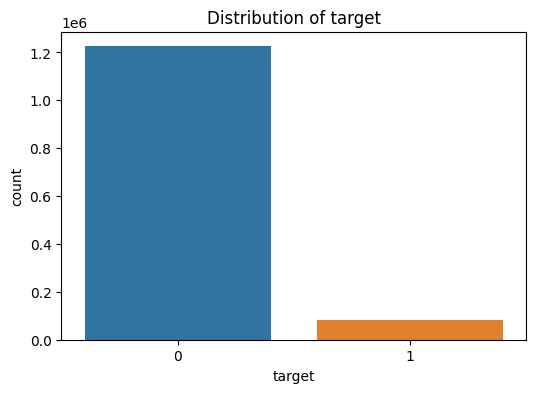

In [6]:
# Plot distribution of target
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df_train,
    x='target'
)
plt.title('Distribution of target')
plt.show()

In [7]:
nltk.download('stopwords')

STOPWORDS = stopwords.words('english')


# Methods preparation
def clean_text_stopwords_removing(text: str) -> str:
    """Clean text with removing stopwords."""
    words = text.split()
    words = [
        word for word in words if word not in STOPWORDS
    ]
    return ' '.join(words)


def evaluate_trained_model(
    model: BaseEstimator,
    X_val_data: list,
    y_val_data: list
) -> None:
    """Evaluate a trained Machine Learning model using various metrics

    This function provides:
    - Accuracy Score: Measures how accurately the class labels are predicted.
    - Precision Score: Evaluates how many of the items predicted as positive are actually positive.
    - Confusion Matrix: Provides a matrix representing TP, FP, FN, TN for each class.
    - Classification Report: Generates a detailed report including Precision, Recall, F1-score, and Support for each class.

    Args:
        model: Trained machine learning model.
        X_test_data, y_test_data: Test data and labels.
    """
    y_pred = model.predict(X_val_data)

    print(f"Evaluation: {model.__class__.__name__}\n")  
    print("Accuracy:", accuracy_score(y_val_data, y_pred))
    print("Precision:", precision_score(y_val_data, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_val_data, y_pred))
    print("Classification Report:\n", classification_report(y_val_data, y_pred))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Data Preprocessing
df_train['question_text'] = df_train['question_text'].apply(clean_text_stopwords_removing)

display(df_train.head())

,qid,question_text,target
0,00002165364db923c7e6,How Quebec nationalists see province nation 19...,0
1,000032939017120e6e44,"Do adopted dog, would encourage people adopt s...",0
2,0000412ca6e4628ce2cf,Why velocity affect time? Does velocity affect...,0
3,000042bf85aa498cd78e,How Otto von Guericke used Magdeburg hemispheres?,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D mountain bike c...,0


In [9]:
# Feature Engineering: TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)

X = vectorizer.fit_transform(df_train['question_text'])
y = df_train['target']

In [10]:
# Model Building: split data
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=42
)

In [11]:
# Model Building: Logistic Regression model and train model
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

# Evaluation
evaluate_trained_model(
    model_lr,
    X_val,
    y_val
)

Evaluation: LogisticRegression

Accuracy: 0.9506364245382333
Precision: 0.6781935202356278
Confusion Matrix:
 [[242113   2950]
 [  9945   6217]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    245063
           1       0.68      0.38      0.49     16162

    accuracy                           0.95    261225
   macro avg       0.82      0.69      0.73    261225
weighted avg       0.94      0.95      0.94    261225



In [12]:
# Model Building: Support Vector Machine
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

# Evaluation
evaluate_trained_model(
    model_svm,
    X_val,
    y_val
)

Evaluation: LinearSVC

Accuracy: 0.9505713465403388
Precision: 0.7010640930462757
Confusion Matrix:
 [[242647   2416]
 [ 10496   5666]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    245063
           1       0.70      0.35      0.47     16162

    accuracy                           0.95    261225
   macro avg       0.83      0.67      0.72    261225
weighted avg       0.94      0.95      0.94    261225



In [13]:
# Model Building: Multinomial Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)

# Evaluation
evaluate_trained_model(
    model_nb,
    X_val,
    y_val
)

Evaluation: MultinomialNB

Accuracy: 0.9460962771557087
Precision: 0.6873087308730873
Confusion Matrix:
 [[243326   1737]
 [ 12344   3818]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    245063
           1       0.69      0.24      0.35     16162

    accuracy                           0.95    261225
   macro avg       0.82      0.61      0.66    261225
weighted avg       0.94      0.95      0.93    261225



In [14]:
# Model Building: Random Forest Classification
model_rf = RandomForestClassifier(
    max_samples=0.8,
    max_depth=20,
    n_jobs=-1,
    random_state=42,
    class_weight='balanced'
)
model_rf.fit(X_train, y_train)

# Evaluation
evaluate_trained_model(
    model_rf,
    X_val,
    y_val
)

Evaluation: RandomForestClassifier

Accuracy: 0.8452521772418413
Precision: 0.2511385549583556
Confusion Matrix:
 [[208559  36504]
 [  3920  12242]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.85      0.91    245063
           1       0.25      0.76      0.38     16162

    accuracy                           0.85    261225
   macro avg       0.62      0.80      0.64    261225
weighted avg       0.94      0.85      0.88    261225

